<a href="https://colab.research.google.com/github/Gracey701/Project-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, RocCurveDisplay

Choice #1
- Link: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
- About: Dataset used to predict if a pateitn is likely to get a stroke or not depending on the following features below such as gender, age, etc.
- Target: stroke (1:had stroke, 0: no stroke)
- Row represents: patient
- Type: Classification
- Features: 11 features not including target
- Rows: 5110
- Challenges: choosing what kind of imputation to use

In [22]:
stroke = pd.read_csv('/content/archive (2).zip')
#copies for before and during preprocessing
eda_stroke = stroke.copy()
ml_stroke = stroke.copy()
stroke.info()
stroke.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploring and Cleaning Data

- Don't need id column as it's unique to each row

In [23]:
# delete unnecessary column(s)
eda_stroke = stroke.drop(columns=['id'])
eda_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [24]:
#no duplicates
eda_stroke.duplicated().sum()

0

In [25]:
eda_stroke.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

bmi columns has 201 missing values
- won't drop as it's above 2% of data
- can fill in missing values with average of all bmi values for exploratory purposes as it is a float feature
- use simple imputation in a pipeline using average value for preprocessing on training data

In [26]:
avg_bmi = eda_stroke['bmi'].mean()
eda_stroke['bmi'].fillna(avg_bmi, inplace=True)
eda_stroke.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Check for inconsistencies in categorical features

In [27]:
eda_stroke['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [28]:
eda_stroke['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [29]:
eda_stroke['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [30]:
eda_stroke['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [31]:
eda_stroke['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [32]:
eda_stroke['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [33]:
eda_stroke['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

# Univariate Visuals

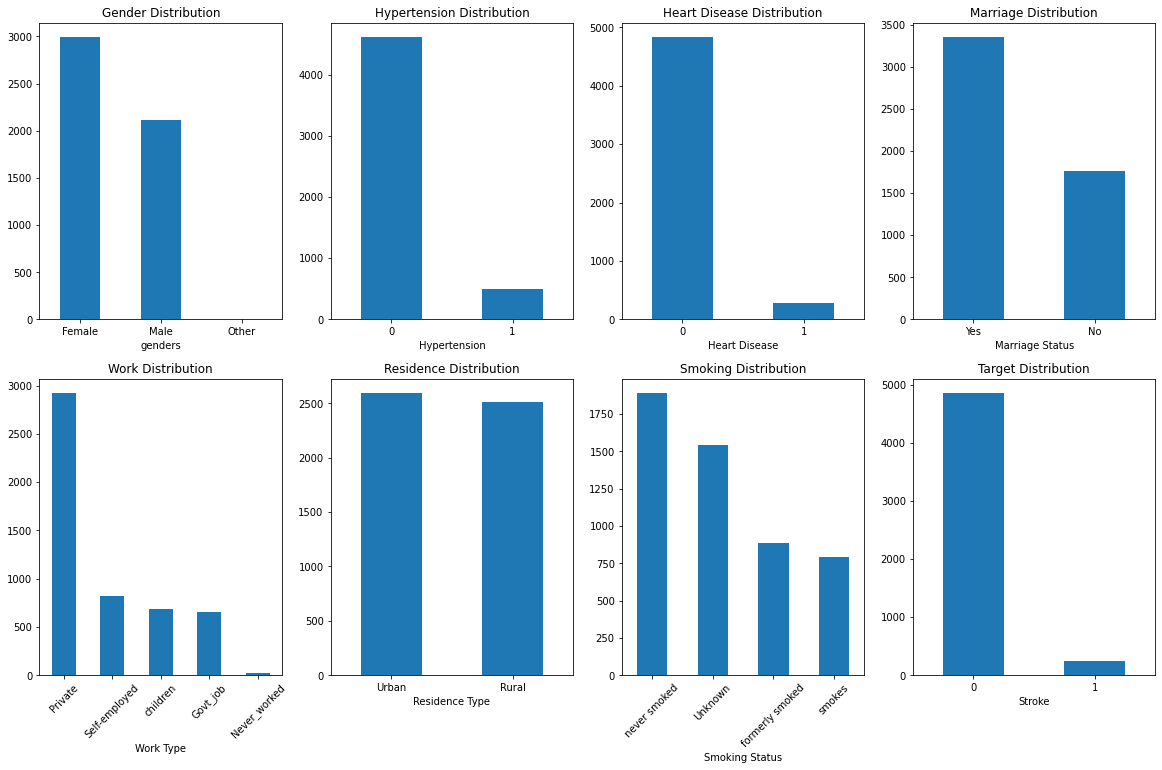

In [34]:
plt.figure(figsize=(20,12))
#make subplots 
plt.subplot(2,4,1)
eda_stroke['gender'].value_counts().plot(kind = 'bar')
plt.xlabel('genders')
plt.xticks(rotation=0)
plt.title('Gender Distribution')

plt.subplot(2,4,2)
eda_stroke['hypertension'].value_counts().plot(kind='bar')
plt.xlabel('Hypertension')
plt.xticks(rotation=0)
plt.title('Hypertension Distribution')

plt.subplot(2,4,3)
eda_stroke['heart_disease'].value_counts().plot(kind = 'bar')
plt.xlabel('Heart Disease')
plt.xticks(rotation=0)
plt.title('Heart Disease Distribution')

plt.subplot(2,4,4)
eda_stroke['ever_married'].value_counts().plot(kind = 'bar')
plt.xlabel('Marriage Status')
plt.xticks(rotation=0)
plt.title('Marriage Distribution')

plt.subplot(2,4,5)
eda_stroke['work_type'].value_counts().plot(kind = 'bar')
plt.xlabel('Work Type')
plt.xticks(rotation=45)
plt.title('Work Distribution')

plt.subplot(2,4,6)
eda_stroke['Residence_type'].value_counts().plot(kind = 'bar')
plt.xlabel('Residence Type')
plt.xticks(rotation=0)
plt.title('Residence Distribution')

plt.subplot(2,4,7)
eda_stroke['smoking_status'].value_counts().plot(kind = 'bar')
plt.xlabel('Smoking Status')
plt.xticks(rotation=45)
plt.title('Smoking Distribution')

plt.subplot(2,4,8)
eda_stroke['stroke'].value_counts().plot(kind = 'bar')
plt.xlabel('Stroke')
plt.xticks(rotation=0)
plt.title('Target Distribution');

Text(0.5, 1.0, 'Bmi Distribution')

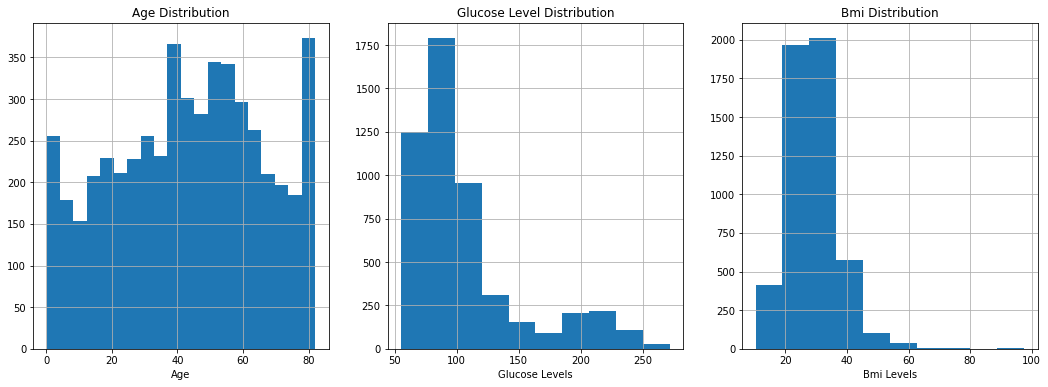

In [35]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
eda_stroke['age'].hist(bins='auto')
plt.xlabel('Age')
plt.title('Age Distribution')

plt.subplot(1,3,2)
eda_stroke['avg_glucose_level'].hist()
plt.xlabel('Glucose Levels')
plt.title('Glucose Level Distribution')

plt.subplot(1,3,3)
eda_stroke['bmi'].hist()
plt.xlabel('Bmi Levels')
plt.title('Bmi Distribution')

# Outliers

In [36]:
eda_stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


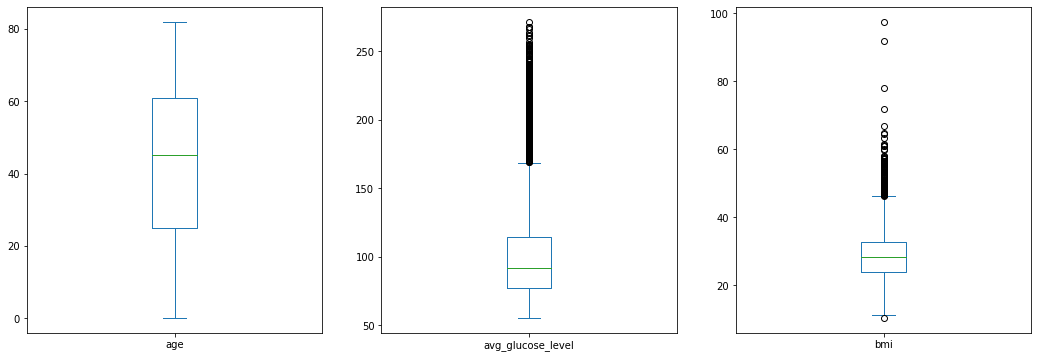

In [37]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
eda_stroke['age'].plot(kind='box')

plt.subplot(1,3,2)
eda_stroke['avg_glucose_level'].plot(kind='box')

plt.subplot(1,3,3)
eda_stroke['bmi'].plot(kind='box');

avg_glucose_level and bmi columns have many outliers surpassing the maximum value